Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5349 - loss: 0.7003 - val_accuracy: 0.6200 - val_loss: 0.6352
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.6400 - loss: 0.6208 - val_accuracy: 0.7200 - val_loss: 0.5158
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.6944 - loss: 0.5510 - val_accuracy: 0.8200 - val_loss: 0.4597
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 532ms/step - accuracy: 0.7334 - loss: 0.5069 - val_accuracy: 0.8600 - val_loss: 0.3986
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.7625 - loss: 0.4579 - val_accuracy: 0.8400 - val_loss: 0.3845
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 0.8181 - loss: 0.4318 - val_accuracy: 0.8800 - val_loss: 0.3445
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - accuracy: 0.9107 - loss: 0.3272 - val_accuracy: 0.9000 - val_loss: 0.2995
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 

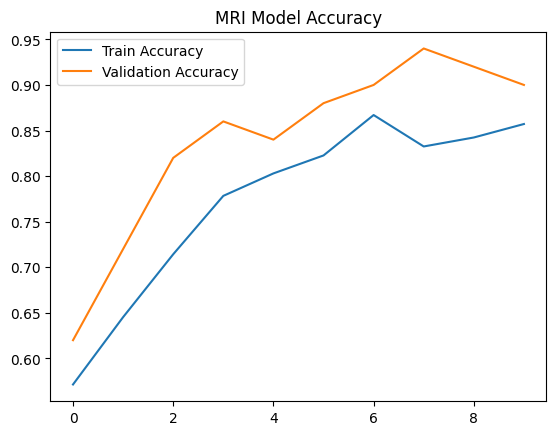

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


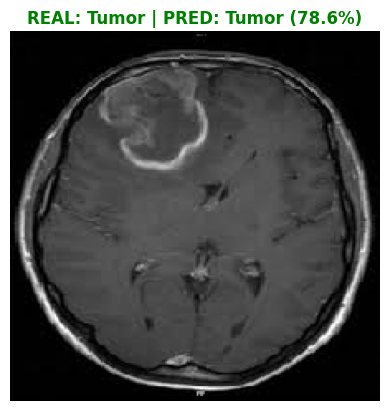

In [13]:
## DATA CLEANING
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2)

train_data = datagen.flow_from_directory(
    'brain_tumor_dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

val_data = datagen.flow_from_directory(
    'brain_tumor_dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

## BASE MODEL TRAINING & BUILDING CLASSIFIER (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10)

## PLOTTING AND TESTING
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MRI Model Accuracy')
plt.legend()
plt.show()

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
folder = random.choice(['brain_tumor_dataset/yes', 'brain_tumor_dataset/no'])
img_path = os.path.join(folder, random.choice(os.listdir(folder)))
real = "Tumor" if 'yes' in folder else "Healthy"

img = image.load_img(img_path, target_size=(224, 224))
prob = model.predict(np.expand_dims(image.img_to_array(img)/255.0, 0))[0][0]
guess = "Tumor" if prob > 0.5 else "Healthy"

plt.imshow(img)
plt.title(f"REAL: {real} | PRED: {guess} ({prob:.1%})", color='green'
          if real==guess else 'red', fontweight='bold')
plt.axis('off')
plt.show()